# Imports 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import random
import time
from tqdm import tqdm
from itertools import combinations
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import datetime

import math
from scipy.stats import norm, kurtosis, mode
cmap = plt.get_cmap('tab10')
from scipy.stats import describe
import seaborn as sns
from matplotlib.pyplot import figure
import pickle
from scipy import stats

# Simulation

In [2]:
BA_0_89 = np.load('data 2/BA1.npy')
BA_90_100 = np.load('data 2/BA2.npy')
ER_0_89 = np.load('data 2/ER1.npy')
ER_90_100 = np.load('data 2/ER2.npy')

In [3]:
BA_all_st = list(BA_0_89) + list(BA_90_100)
ER_all_st = list(ER_0_89) + list(ER_90_100)

In [4]:
BA_hub_count = []

for j in tqdm(range(100)):
    G = nx.Graph()
    G = nx.read_gpickle('data 2/4b-BA-instance-' + str(j) + '.pickle')
    nodes = list(G.nodes())
    hub_count = 0
    for n in nodes:
        nn = nx.all_neighbors(G, n)
        d_n = G.degree(n)
        nn_n = sum([G.degree(x) for x in nn])
        if d_n ** 2 > nn_n:
            hub_count = hub_count + 1
    BA_hub_count.append(hub_count)

100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 55.53it/s]


In [5]:
ER_hub_count = []

for j in tqdm(range(100)):
    G = nx.Graph()
    G = nx.read_gpickle('data 2/4b-ER-instance-' + str(j) + '.pickle')
    nodes = list(G.nodes())
    hub_count = 0
    for n in nodes:
        nn = nx.all_neighbors(G, n)
        d_n = G.degree(n)
        nn_n = sum([G.degree(x) for x in nn])
        if d_n ** 2 > nn_n:
            hub_count = hub_count + 1
    ER_hub_count.append(hub_count)

100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 56.53it/s]


In [6]:
median_st_time_BA = []
median_st_time_ER = []
skewness_BA = []
skewness_ER = []

In [7]:
for l in ER_all_st:
    median_st_time_ER.append(np.percentile(l,50))
    skewness_ER.append(describe(l)[4])
for l in BA_all_st:
    median_st_time_BA.append(np.percentile(l,50))
    skewness_BA.append(describe(l)[4])

In [8]:
np.corrcoef(ER_hub_count, median_st_time_ER)

array([[1.        , 0.03729967],
       [0.03729967, 1.        ]])

In [9]:
np.corrcoef(BA_hub_count, median_st_time_BA)

array([[1.        , 0.63017197],
       [0.63017197, 1.        ]])

In [10]:
stats.spearmanr(ER_hub_count, median_st_time_ER)

SpearmanrResult(correlation=0.05915142200521551, pvalue=0.5588236704914397)

In [11]:
stats.spearmanr(BA_hub_count, median_st_time_BA)

SpearmanrResult(correlation=0.6266324128221947, pvalue=3.0874623550186304e-12)

In [12]:
np.corrcoef(ER_hub_count, skewness_ER)

array([[1.        , 0.08158109],
       [0.08158109, 1.        ]])

In [19]:
np.corrcoef(BA_hub_count, skewness_BA)

array([[1.        , 0.02557009],
       [0.02557009, 1.        ]])

In [22]:
rn_t, _ = stats.boxcox(rn)

In [26]:
#sf_t, _ = stats.boxcox(sf)

(array([ 1.,  0.,  0., 12., 22., 25., 15., 13., 11.,  1.]),
 array([-2.51875601, -2.0467131 , -1.57467018, -1.10262727, -0.63058436,
        -0.15854144,  0.31350147,  0.78554438,  1.2575873 ,  1.72963021,
         2.20167312]),
 <BarContainer object of 10 artists>)

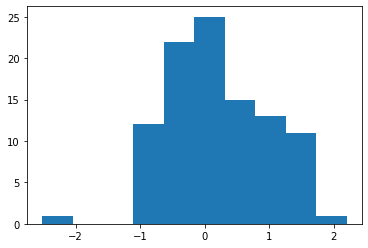

In [28]:
plt.hist(rn_t)

# Plot

In [24]:
rn = []
for l in ER_all_st:
    rn.append(describe(l)[4])
sf = []
for l in BA_all_st:
    sf.append(describe(l)[4])

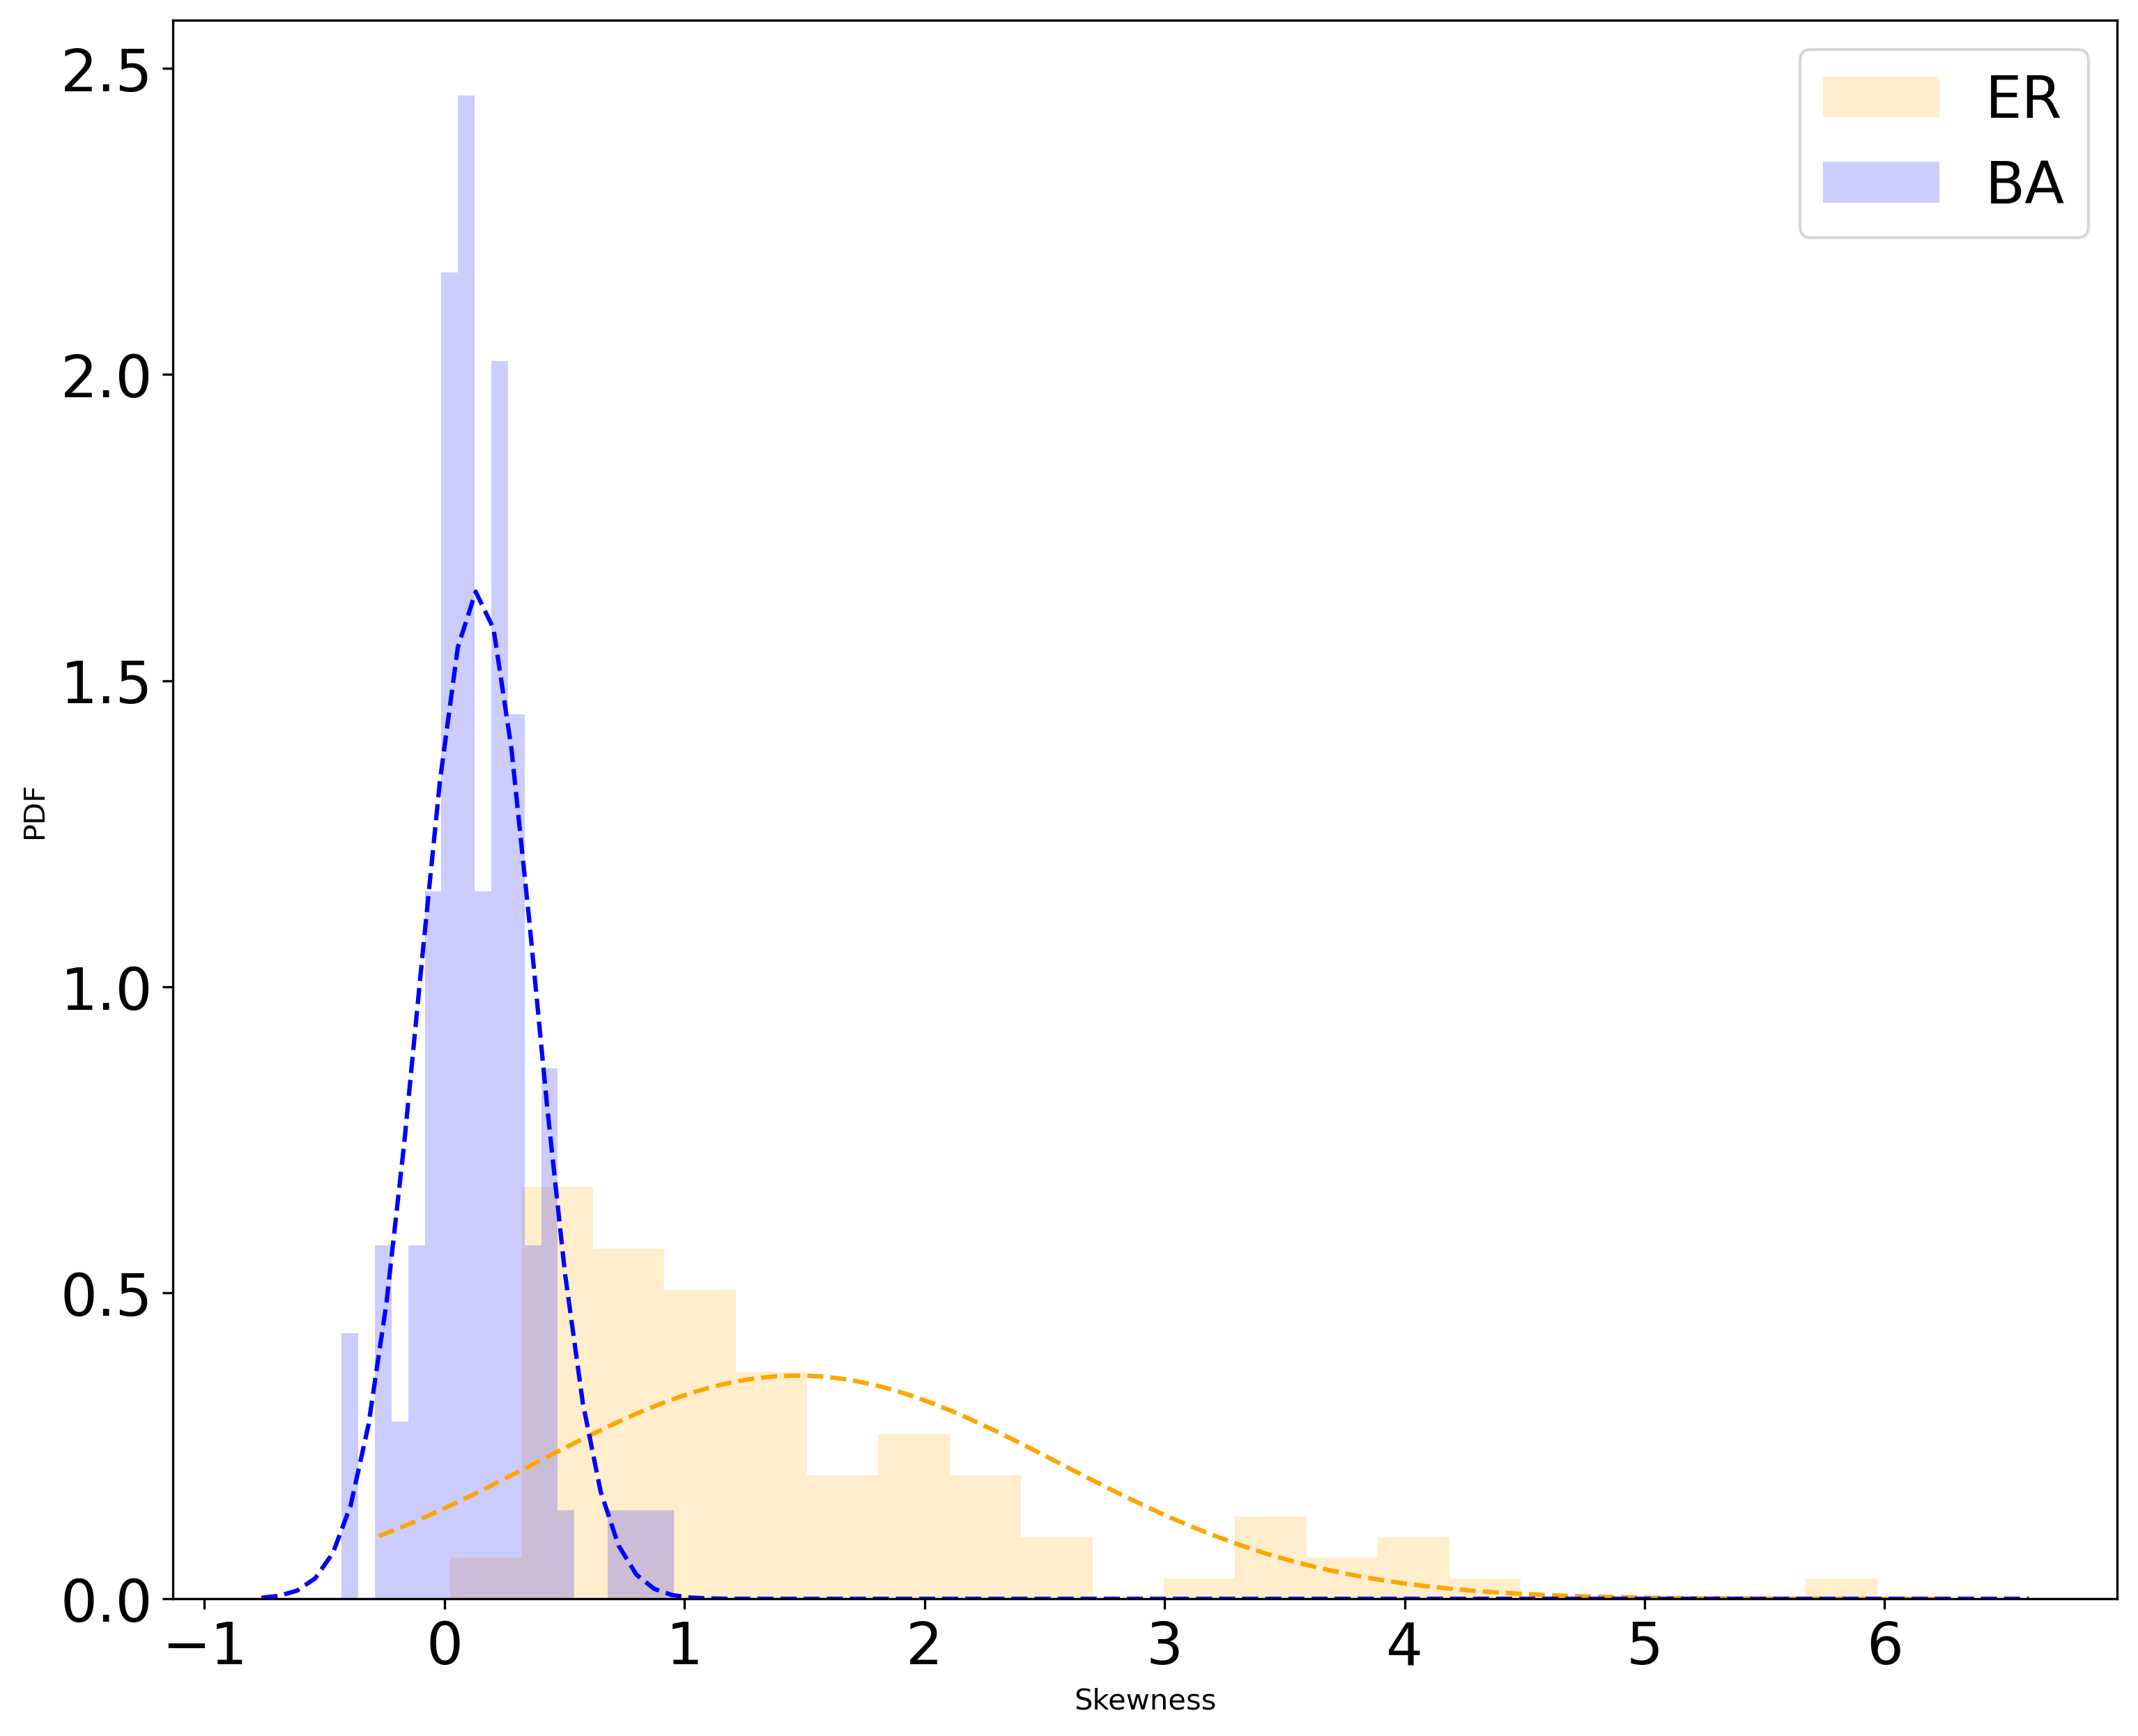

In [17]:
figure(figsize=(12,10), dpi=300)
plt.hist(rn,alpha=0.2,density=True,bins=20,label='ER',color='orange')
mean,std=norm.fit(rn)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y,color='orange',linestyle='dashed')
plt.hist(sf,alpha=0.2,density=True,bins=20,label='BA',color='blue')
mean,std=norm.fit(sf)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y,color='blue',linestyle='dashed')
plt.legend(prop={'size': 20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Skewness')
plt.ylabel('PDF')
plt.savefig('figures/figure-4b.png')
plt.show()

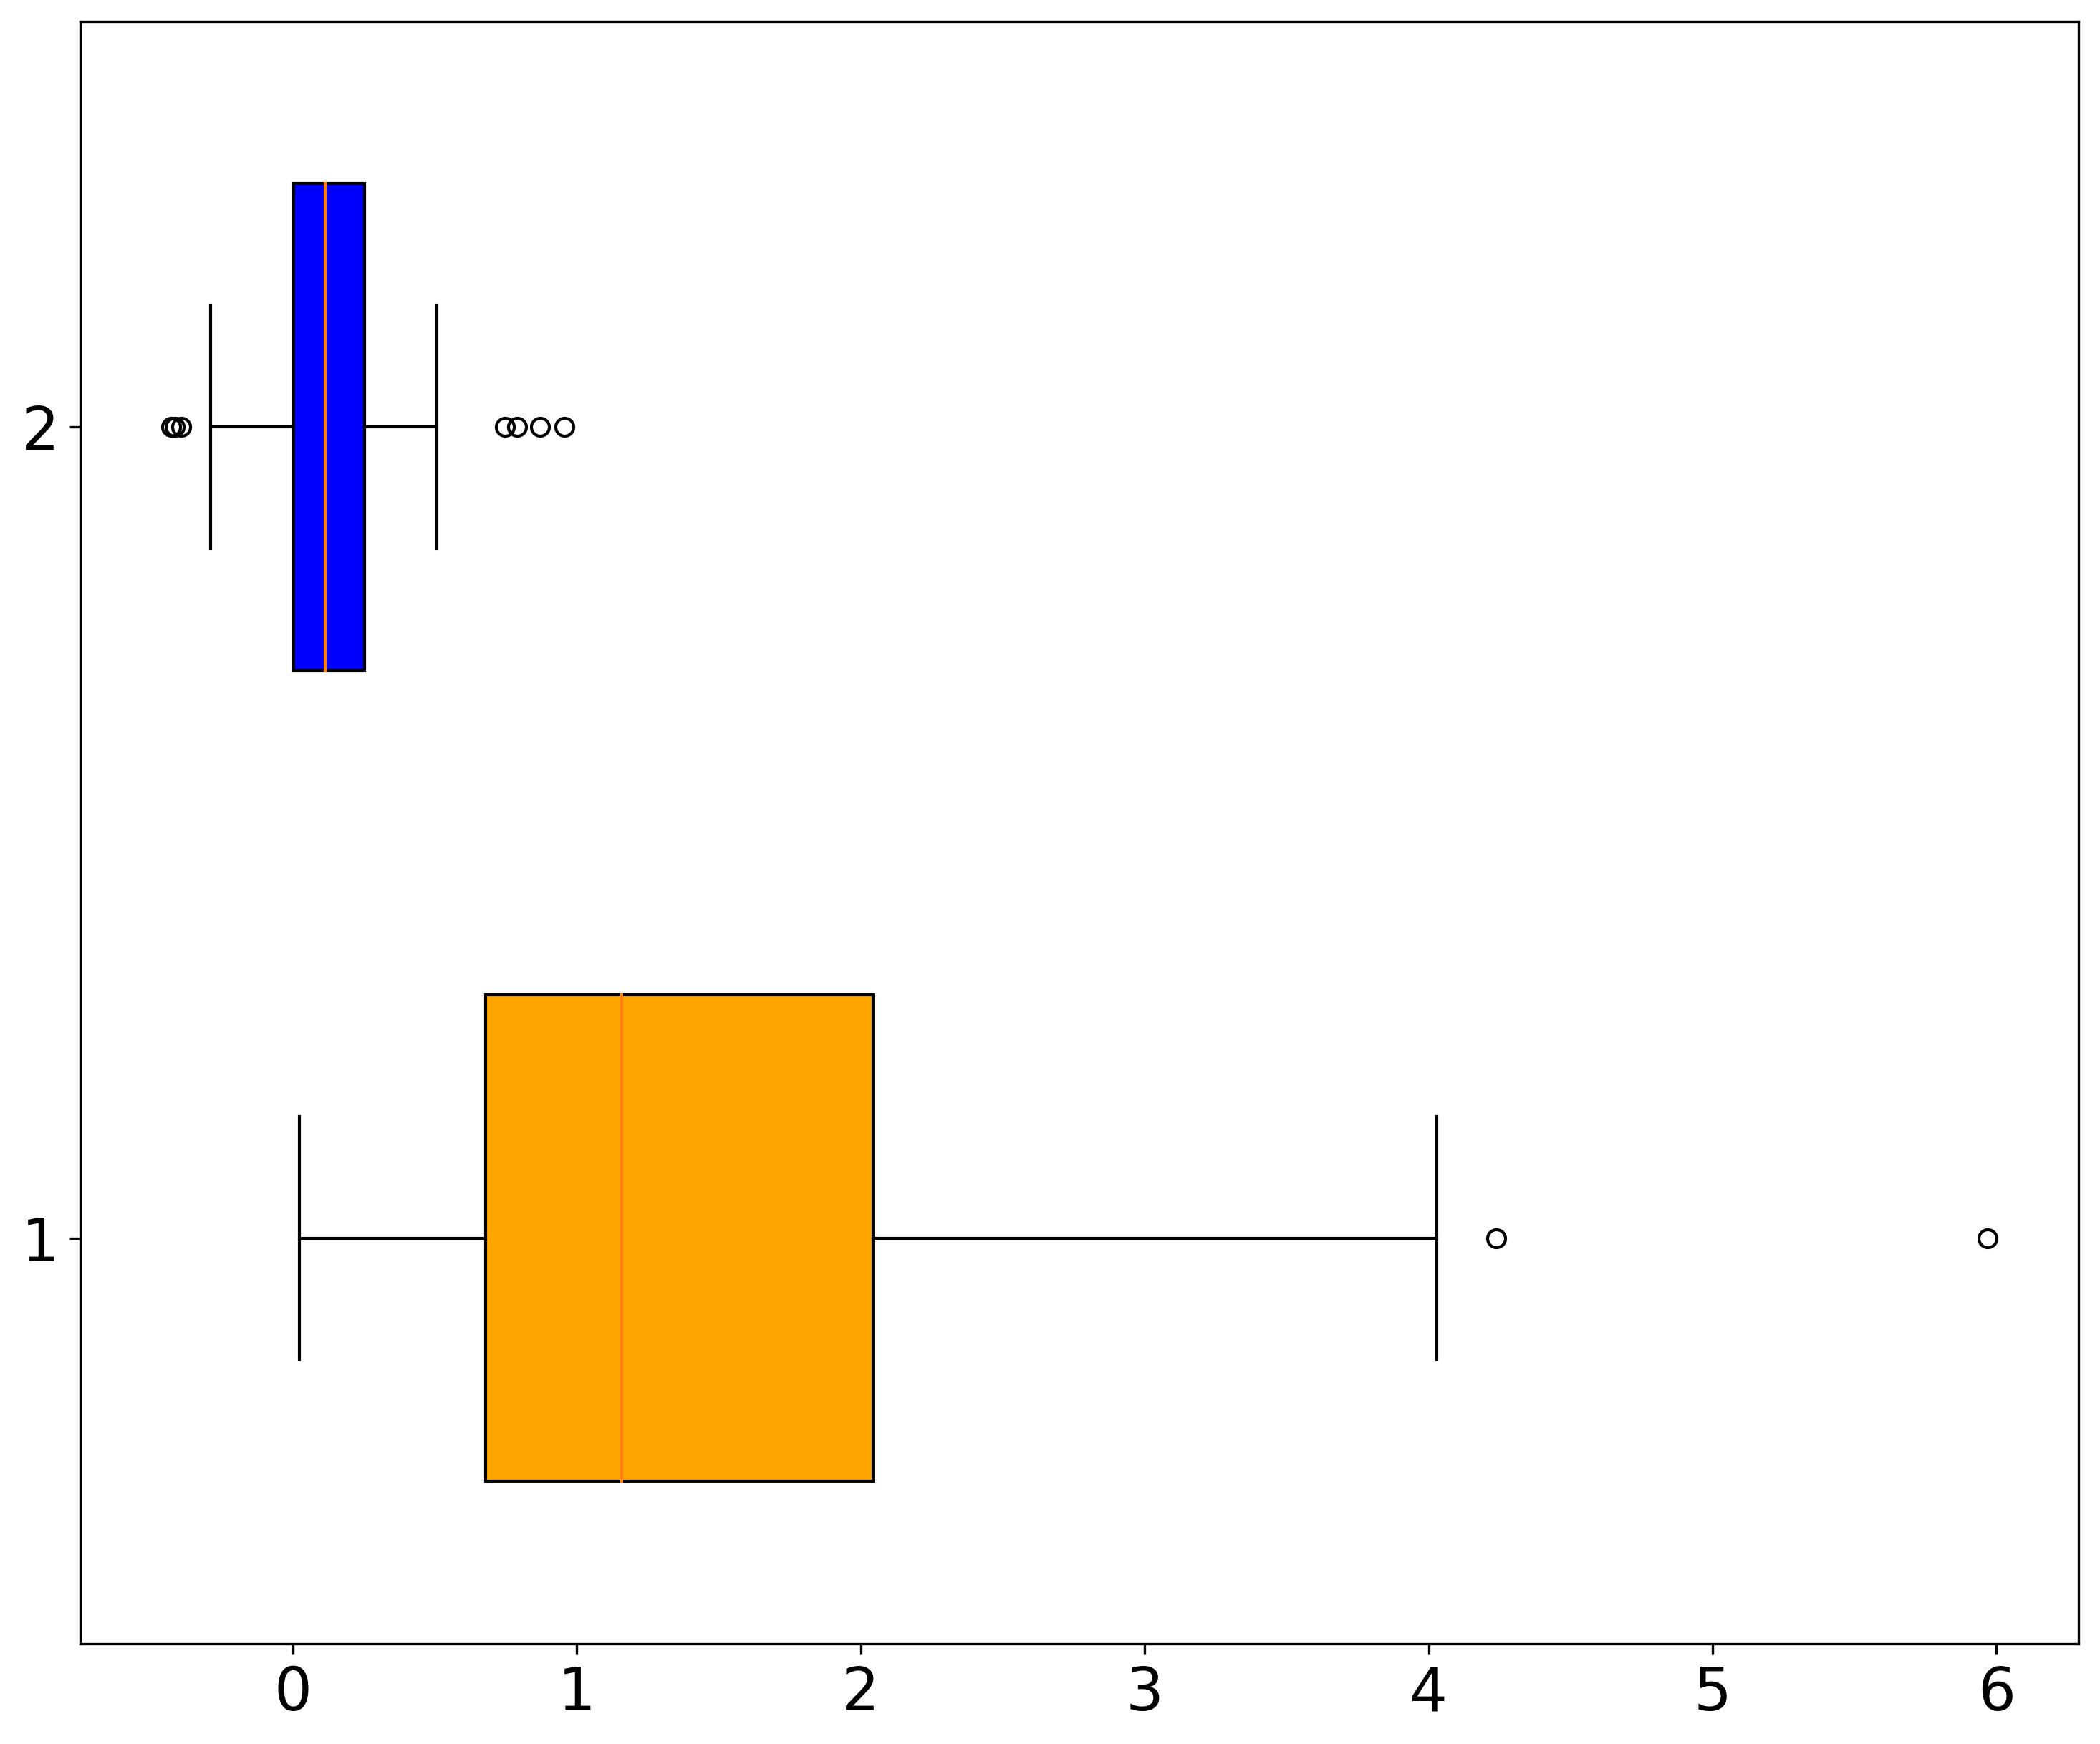

In [18]:
figure(figsize=(12,10), dpi=300)

df = pd.DataFrame()
df['ER'] = rn
df['BA'] = sf
box = plt.boxplot(df, patch_artist=True,vert=False,widths = 0.6)

colors = ['orange','blue']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
#plt.legend(prop={'size': 20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('figures/figure-4b-Box.png')
plt.show()

# Fit

## ER

In [15]:
mean,std=norm.fit(rn)
print('Probability of asymmetric saturation time: ', 1-norm(mean, std).cdf(1))

Probability of asymmetric saturation time:  0.6661107790709002


In [16]:
from scipy.stats import ttest_ind

nfit1 = np.random.normal(loc=mean, scale=std, size=len(rn))
res = ttest_ind(nfit1, rn)
print(res)

Ttest_indResult(statistic=-0.7821936653920523, pvalue=0.43503517510543965)


## BA

In [17]:
mean,std=norm.fit(sf)
print('Probability of asymmetric saturation time: ', 1-norm(mean, std).cdf(1))

Probability of asymmetric saturation time:  0.00018632485317970904


In [18]:
nfit1 = np.random.normal(loc=mean, scale=std, size=len(rn))
res = ttest_ind(nfit1, rn)
print(res)

Ttest_indResult(statistic=-11.750258197798356, pvalue=1.5727408737439082e-24)
